In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_classes = pd.read_csv('./visits/data/visits_Conference.owl_class_501.csv', header = 0, sep=",")
order = pd.read_csv('./visits/data/visits_Order_Conference.owl_class_501.csv', header = 0, sep=",")
ant = pd.read_csv('./visits/data/visits_ant_Conference.owl_class_501.csv', header = 0, sep=",")
data_classes.head()

,nodeNumber,node,visits,paths,uniquepaths
0,0,Contribution_co-author,0,,
1,1,Conference_www,8,Conference_www Conference_www Conference_www...,Conference_www
2,2,Active_conference_participant,10,Active_conference_participant Active_confere...,Active_conference_participant
3,3,Contribution_1th-author,8,Contribution_1th-author Contribution_1th-aut...,Contribution_1th-author
4,4,Extended_abstract,20,Abstract Extended_abstract Extended_abstract...,Abstract Extended_abstract


In [2]:
order.head()


,nodeId,nodeName,nodeType,nodeLevel,loop,hop,path
0,34,Conference_contributor,Class,-1,0,0,Conference_contributor
1,40,Person,Class,-1,0,1,Conference_contributor Person
2,23,Conference_proceedings,Class,-1,1,0,Conference_proceedings
3,52,Regular_contribution,Class,-1,2,0,Regular_contribution
4,21,Written_contribution,Class,-1,2,1,Regular_contribution Written_contribution


In [3]:
ant.head()

,rootId,root,childId,child,incremental visits
34,Conference_contributor,40,Person,1,Conference_contributor Person
52,Regular_contribution,21,Written_contribution,1,Regular_contribution Written_contribution
21,Written_contribution,41,Conference_contribution,1,Regular_contribution Written_contribution Conf...
41,Conference_contribution,49,Conference_document,1,Regular_contribution Written_contribution Conf...
12,Invited_speaker,34,Conference_contributor,2,Invited_speaker Conference_contributor


In [4]:
data_classes.head()

,nodeNumber,node,visits,paths,uniquepaths
0,0,Contribution_co-author,0,,
1,1,Conference_www,8,Conference_www Conference_www Conference_www...,Conference_www
2,2,Active_conference_participant,10,Active_conference_participant Active_confere...,Active_conference_participant
3,3,Contribution_1th-author,8,Contribution_1th-author Contribution_1th-aut...,Contribution_1th-author
4,4,Extended_abstract,20,Abstract Extended_abstract Extended_abstract...,Abstract Extended_abstract


In [128]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 90
pd.options.display.max_rows = 999

loggingFile = './visits/data/TitleBody3GramTFIDF.txt'
binaryBodyTitle = './visits/data/binaryBodyTitle.csv'
template = './visits/data/dfTeste.csv'

#tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
#confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)

tfIDFoutputFile = './visits/data/tfIDFConference.csv'
#classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  

test_type = "DecisionTree"
#test_type = "LogisticRegression"
#test_typeList = ["RandomForest","DecisionTree","LogisticRegression","MLPClassifier","MLkNN"]

predictions_result = './visits/data/predict_file_'+'.csv'
probabilities_result = './visits/data/probability_file_'+'.csv'
modelMatrix = './visits/data/modelMatrix'+'.csv'
metrics_by_class = './visits/data/metrics_By_Class'+'.csv'  
confusionMatrix = './visits/data/CM'+'.csv'

configurationTFIDF = '(1,1)'
num_feature = 25
stop_word = 'Yes'
size_test = 0.2
splits = 10

In [6]:
#TF-ID
def run_tf_idf(data, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    #, max_features=num_feature
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)
        
    tf_idf_results = vectorizer.fit_transform(data['uniquepaths'])

    features = vectorizer.get_feature_names()

    print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)
    
    output_tf_idf = pd.concat([data['nodeNumber'], output_tf_idf], axis=1)

    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:
    

In [7]:
run_tf_idf(data_classes, (1,1), 25, './visits/data/tfIDFConference.csv')

['abstract', 'accepted_contribution', 'active_conference_participant', 'author', 'camera_ready_contribution', 'chair', 'co', 'contribution_1th', 'early_paid_applicant', 'extended_abstract', 'invited_talk', 'late_paid_applicant', 'paid_applicant', 'paper', 'passive_conference_participant', 'poster', 'presentation', 'registeered_applicant', 'regular_author', 'regular_contribution', 'rejected_contribution', 'reviewed_contribution', 'submitted_contribution', 'track', 'written_contribution']


In [8]:
#analyzing frequency of TOP 50 terms

def analyze_top(data, termFrequencyTop50):
    docs = data['paths'].tolist() #uniquepaths?

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

    top50 = a[:100]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

    print(df_frequency)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs


                              term  frequency
0             written_contribution        240
1          conference_contribution        216
2                           person        170
3             regular_contribution        168
4              conference_document        162
5            reviewed_contribution        140
6           submitted_contribution        132
7            registeered_applicant        111
8                   paid_applicant        108
9                extended_abstract        100
10           accepted_contribution         96
11          conference_contributor         88
12            conference_applicant         86
13          conference_participant         58
14                           chair         54
15                  regular_author         51
16       camera_ready_contribution         49
17                committee_member         46
18            early_paid_applicant         45
19             late_paid_applicant         45
20                           track

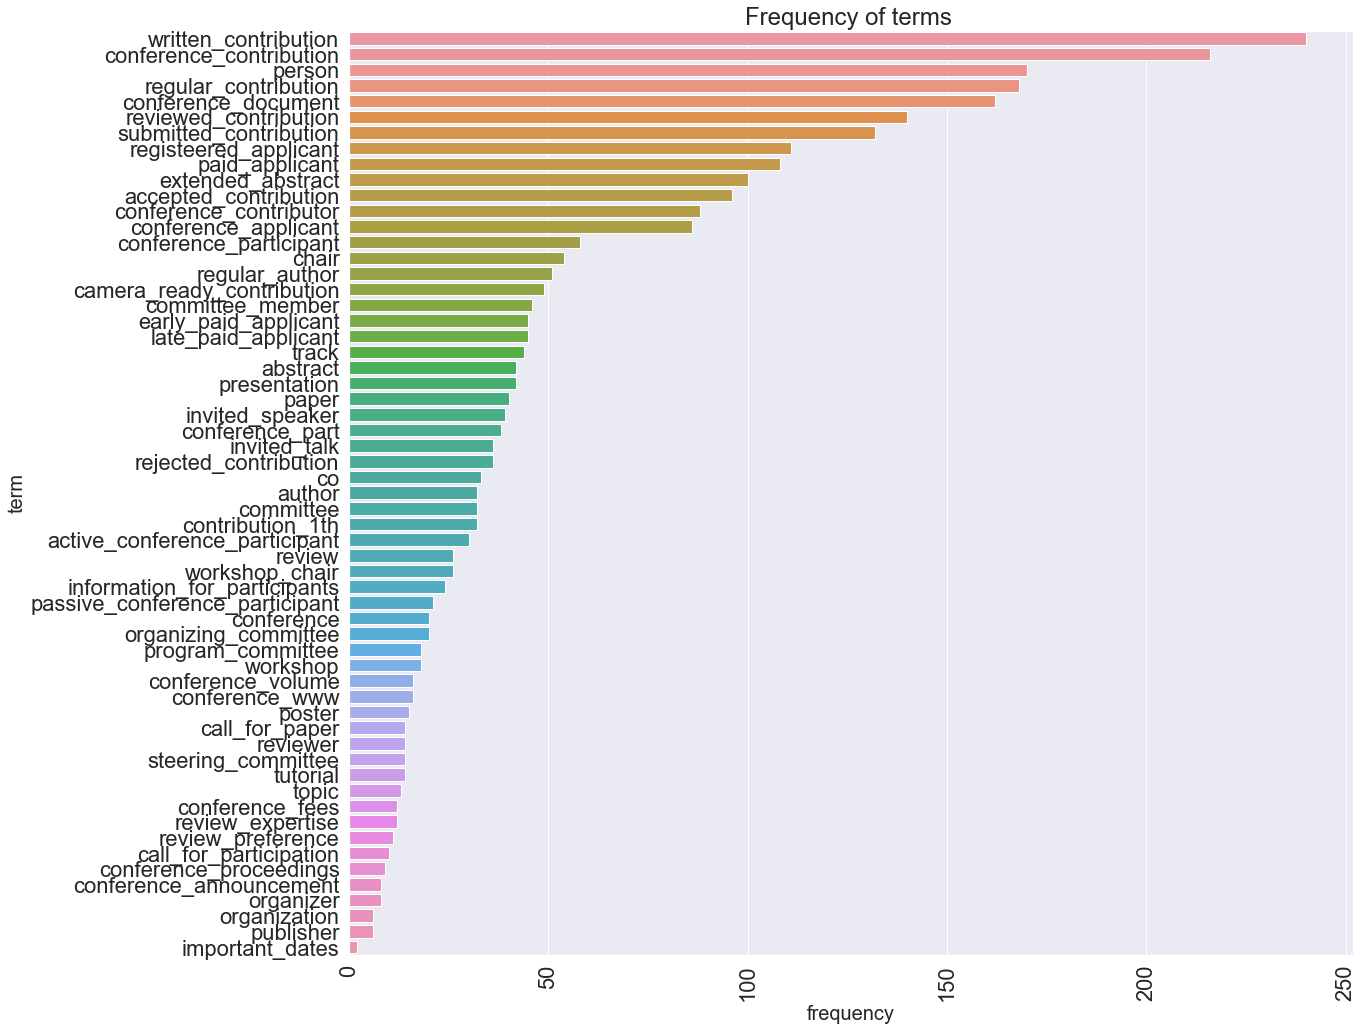

In [9]:
docs = analyze_top(data_classes, './visits/data/termFrequencyTop50.csv')

In [26]:
#merging features TF-IDF with data_frame
def merging(data_test1, tfIDFoutputFile):
    feature = pd.read_csv(tfIDFoutputFile, header=None, sep=",")
    feature.rename(columns={0: 'nodeNumber'}, inplace=True)
    
    labels = pd.read_csv('./visits/data/visits_bin_Conference.owl_class_501.csv', sep=",")

    data_classifier = data_test1.join(labels, lsuffix='nodeNumber', rsuffix='nodeNumber')
    data_classifier2 = data_classifier.join(feature, lsuffix='nodeNumber', rsuffix='nodeNumber')
    #data_classifier = data_test1.join(feature, lsuffix='nodeNumber', rsuffix='nodeNumber')
    #data_classifier2 = data_classifier.join(labels, lsuffix='nodeNumber', rsuffix='nodeNumber')
    data_classifier2.to_csv('./visits/data/confBinary.csv', encoding='utf-8', index=False, sep=',')

    categories = data_classifier2.columns.values.tolist()
    
    return data_classifier2, categories

In [27]:
data_classifier2, categories = merging(data_classes, './visits/data/tfIDFConference.csv')

In [28]:
categories

['nodeNumbernodeNumber',
 'node',
 'visits',
 'paths',
 'uniquepaths',
 'nodeNumbernodeNumber',
 'Rejected_contribution',
 'Regular_contribution',
 'Organizing_committee',
 'Conference',
 'Review_expertise',
 'Track-workshop_chair',
 'Accepted_contribution',
 'Written_contribution',
 'Tutorial',
 'Conference_volume',
 'Regular_author',
 'Conference_www',
 'Extended_abstract',
 'Active_conference_participant',
 'Review_preference',
 'Program_committee',
 'Late_paid_applicant',
 'Conference_announcement',
 'Poster',
 'Conference_contribution',
 'Paid_applicant',
 'Conference_part',
 'Person',
 'Conference_document',
 'Organization',
 'Organizer',
 'Chair',
 'Review',
 'Information_for_participants',
 'Committee',
 'Important_dates',
 'Steering_committee',
 'Call_for_paper',
 'Camera_ready_contribution',
 'Invited_speaker',
 'Conference_participant',
 'Reviewed_contribution',
 'Invited_talk',
 'Workshop',
 'Topic',
 'Passive_conference_participant',
 'Abstract',
 'Contribution_1th-author'

In [16]:
def eval_metrics(predictions, probabilities, y_test):
    
    y_pred = predictions.values
    y_proba = probabilities.values

    #receiving the y_test true value from each pull request
    y_true = y_test.to_numpy()

    print("Accuracy Score")
    acc_ml = accuracy_score(y_true, y_pred)
    print(acc_ml)

    print("---------")
    print("")

    print("Accuracy Score not normalized")
    acc_score = accuracy_score(y_true, y_pred, normalize=False)
    print(acc_score)

    print("---------")
    print("")

    print("zero_one_loss")
    zeroOne = zero_one_loss(y_true, y_pred)
    print(zeroOne)

    print("---------")
    print("")

    print("Fmeasure Score")
    fmeasure_score = f1_score(y_true,y_pred, average='micro')
    #fmeasure_score = f1_score(y_true,y_pred, average='macro')
    print(fmeasure_score)

    print("---------")
    print("")

    #AUC-PR
    print("AUC-PR")
    pr_score = average_precision_score(y_true,y_proba,average='micro')
    print(pr_score)
    #pr_score = average_precision_score(y_true,y_proba,average='macro')

    print("---------")
    print("")


    print("hamming loss average")
    hamming_loss = skm.hamming_loss(y_true, y_pred)
    print(hamming_loss)

    print("---------")
    print("")

    print("Jaccard samples")
    jaccard_score_samples = jaccard_score(y_true, y_pred, average='samples')
    print(jaccard_score_samples)

    print("---------")
    print("")


    print("Jaccard macro")
    jaccard_macro = jaccard_score(y_true, y_pred, average='micro')
    print(jaccard_macro)
    #jaccard_score(y_true, y_pred, average=None)

    print("---------")
    print("")

    return y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro

In [17]:
def plot_classes(probability, y_true, y_test):
    precision = dict()
    recall = dict()
    average_precision = dict()

    n_classes = y_test.shape[1]

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], probability[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], probability[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),probability.ravel())

    average_precision["micro"] = average_precision_score(y_true, probability, average="micro")

    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))


In [114]:
import io
def confusion_matrix(y_true, y_pred, confusionMatrix, i):

    data = multilabel_confusion_matrix(y_true, y_pred)
    
    #labels = ['Google Common', 'Test', 'SO', 'IO', 'UI', 'Network',
   #           'Security', 'OpenOffice Documents', 'Database','PDF',
    #          'Logging','Latex']
    serie = data_classifier2.iloc[0:0,6:64]
    cols = serie.columns.values

    labels = cols.tolist()
      
    metrics = pd.DataFrame()
    line = []
    dataLine = ""
    dataLine = "Label, TN, FP, FN, TP"
    line.append((dataLine))

    for j in range (0,12):
        print(j)
        row = data[j]
        dataLine=""
        dataLine = labels[j] 
        print(dataLine)
        for x in np.nditer(row):
            dataLine = dataLine + "," + str(x)
            print(dataLine)
        line.append((dataLine))
        print(line)
        
        metrics = pd.DataFrame(line)
    
    metrics.to_csv(confusionMatrix + str(i) +'.csv' , encoding='utf-8', header=True, index=False , sep=',')
    

In [19]:
#build the model 

def build_model(test_type):

    if test_type == "DecisionTree":
        clf = BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense = [False, True])
        #clf = ClassifierChain(classifier=DecisionTreeClassifier(), require_dense = [False, True])
    if test_type == "LogisticRegression":
        clf = BinaryRelevance(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
        #clf = ClassifierChain(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
    if test_type == "RandomForest": 
        clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
        #clf = ClassifierChain(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
    if test_type == "MLPClassifier":
        clf = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
        #clf = ClassifierChain(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
    if test_type == "MLkNN":
        clf = BinaryRelevance(MLkNN(k=3))
        #clf = ClassifierChain(classifier=MLkNN(k=3))

    #This three works without probability
    if test_type == "LinearSVC":
        clf = BinaryRelevance(classifier=LinearSVC(), require_dense = [False, True])
    if test_type == "GaussianNB":
        clf = BinaryRelevance(classifier=GaussianNB(), require_dense = [False, True])
    if test_type == "RidgeClassifierCV":
        clf = BinaryRelevance(classifier=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]), require_dense = [False, True]) 
    if test_type == "BRkNNaClassifier":
        clf = BinaryRelevance(BRkNNaClassifier(k=3))

        
    return clf

In [125]:
def save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type):

    line=[] 
    # line to csv report file
    
    #names = ['Google Common',
#'Test',
#'SO',
##'IO',
#'UI',
#'Network',
#'Security',
#'OpenOffice Documents',
#'Database',
#'PDF',
#'Logging',
#'Latex']
    
    serie = data_classifier2.iloc[0:0,6:64]
    cols = serie.columns.values

    names = cols.tolist()

    

    prec, rec, fscore, sup = precision_recall_fscore_support(y_true,y_pred, average='micro')


    arr = [acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro,prec,rec, fscore]
    columns = ['Accuracy','Acc-Score','zero_one_loss','AUC-PR','hamming loss average','Jaccard samples','Jaccard macro','Precision','Recall','Fmeasure']
  
    df_metrics2 = pd.DataFrame([arr],columns=columns)
    print(df_metrics2)

    print("---------")
    print("")

    x = precision_recall_fscore_support(y_true,y_pred, average=None)
    print("")
    print("")

    df_metrics_by_class = pd.DataFrame.from_records(x, columns=names, index=['precision','recall','f-measure','samples_tested'])
    print(df_metrics_by_class)

    print("---------")
    print("")

    df_metrics2.to_csv(modelMatrix, encoding='utf-8', header=True, index=False, sep=',')    

    df_metrics_by_class.to_csv(metrics_by_class, encoding='utf-8', header=True, index=False, sep=',')    

    dataLine = ""
    dataLine = "tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i"
    line.append((dataLine))
    dataLine =  str(configurationTFIDF) + "," + str(num_feature) + "," + stop_word + "," + str(size_test) + "," + str(test_type) + "," + str(acc_ml) + ","+ str(acc_score) + ","+ str(zeroOne) + "," + str(pr_score) + ","+ str(hamming_loss) + ","+ str(jaccard_score_samples) + ","+ str(jaccard_macro)+"," + str(prec)+","+str(rec)+","+str(fscore)+","+str(i) 
    line.append((dataLine))
    print(line)

    metrics = pd.DataFrame(line)
    #metrics.to_csv('./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    #np.savetxt(r'./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.txt', metrics.values, fmt='%s', delimiter=',')
    metrics.to_csv('./visits/data/report'+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    np.savetxt(r'./visits/data/report'+'.txt', metrics.values, fmt='%s', delimiter=',')

    return prec, rec, fscore, sup

In [130]:
import datetime

def persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore, i):
    now = datetime.datetime.now()

    templateData = pd.read_csv(template, sep=',')
    
    print ("Current date and time : ")
    print (now.strftime("%Y-%m-%d %H:%M:%S"))
    headerdf = ['date_time','tf-IDF', '#_TopTerms','Stop_Word','Train/Test_Size','Algorithm','Accuracy_Score',
                'Accuracy_Score_not_normalized','zero_one_loss', 'AUC-PR','hamming_loss_avg','Jaccard_samples',
                'Jaccard_macro','Precision','Recall','Fmeasure_Score','i']


    tup = ( now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i))

    print("tupla:", tup)
    print(len(tup))

    list_tup  = [ now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i)]


    dfTeste = pd.DataFrame.from_records(data=[tup], columns=[headerdf])

    data_list = templateData.values.tolist()
    data_list.append(list_tup)
    new_data = pd.DataFrame(data_list)  
    for row in templateData.itertuples():
        print(row)

    #new_data.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  
    new_data.to_csv('./visits/data/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  
    

In [134]:
def run_split(data_classifier2, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test):
    train = []
    test = []

    X = data_classifier2
    data_classifier2.to_csv('./visits/data/data_classifier2.csv', encoding='utf-8', sep=',') 
    rs = ShuffleSplit(n_splits=splits, test_size= size_test, random_state=52)
    rs.get_n_splits(X)

    for train_index, test_index in rs.split(X):
         #print("%s %s" % (train_index, test_index))
         train.append(train_index)
         test.append(test_index)
        
    for i in range(0, len(train)):
 
        size_features = len(X.columns)
        #data = data_classifier.ix[train[i]] #df.iloc[:, 'col_header']
        #data = data_classifier.isin[train[i]]
        #X_train = data.iloc[train[1],1:size_features]
        #del X_train['issueNumberissueNumber']
        X_train = data_classifier2.iloc[train[i],65:size_features]
        y_train = data_classifier2.iloc[train[i],6:64]

        #data = data_classifier.ix[test[i]]
        #data = data_classifier.isin[test[i]]
        X_test = data_classifier2.iloc[test[i],65:size_features]
        y_test = data_classifier2.iloc[test[i],6:64]

        categories = y_test.columns.values.tolist()
        ids = y_test.index

        classifier_setup = build_model(test_type)
    
        clf = classifier_setup
        clf.fit(X_train,y_train)

        predict = clf.predict(X_test).toarray()
        #probability = clf.predict_proba(X_test).toarray()

        predictions = pd.DataFrame(predict, index=ids, columns=categories) # with header
        #probabilities = pd.DataFrame(probability, index=ids, columns=categories) # with header

        y_pred = predictions.values
        #y_proba = probabilities.values

        y_true = y_test.to_numpy()

        y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)

        plot_classes(probability, y_true, y_test)

        confusion_matrix(y_true, y_pred, confusionMatrix, i)
        
        prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)

        persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore, i)
        

Accuracy Score
0.0
---------

Accuracy Score not normalized
0
---------

zero_one_loss
1.0
---------

Fmeasure Score
0.5531914893617021
---------

AUC-PR
0.3546455938697319
---------

hamming loss average
0.03017241379310345
---------

Jaccard samples
0.25833333333333336
---------

Jaccard macro
0.38235294117647056
---------

Average precision score, micro-averaged over all classes: 0.35
0
Rejected_contribution
Rejected_contribution,12
Rejected_contribution,12,0
Rejected_contribution,12,0,0
Rejected_contribution,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0']
1
Regular_contribution
Regular_contribution,11
Regular_contribution,11,0
Regular_contribution,11,0,1
Regular_contribution,11,0,1,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,11,0,1,0']
2
Organizing_committee
Organizing_committee,12
Organizing_committee,12,0
Organizing_committee,12,0,0
Organizing_committee,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score
0.0
---------

Accuracy Score not normalized
0
---------

zero_one_loss
1.0
---------

Fmeasure Score
0.5607476635514019
---------

AUC-PR
0.135119940029985
---------

hamming loss average
0.06752873563218391
---------

Jaccard samples
0.2886857707509881
---------

Jaccard macro
0.38961038961038963
---------

Average precision score, micro-averaged over all classes: 0.14
0
Rejected_contribution
Rejected_contribution,11
Rejected_contribution,11,0
Rejected_contribution,11,0,0
Rejected_contribution,11,0,0,1
['Label, TN, FP, FN, TP', 'Rejected_contribution,11,0,0,1']
1
Regular_contribution
Regular_contribution,10
Regular_contribution,10,1
Regular_contribution,10,1,0
Regular_contribution,10,1,0,1
['Label, TN, FP, FN, TP', 'Rejected_contribution,11,0,0,1', 'Regular_contribution,10,1,0,1']
2
Organizing_committee
Organizing_committee,12
Organizing_committee,12,0
Organizing_committee,12,0,0
Organizing_committee,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,11,0,0,1', 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.03
0
Rejected_contribution
Rejected_contribution,12
Rejected_contribution,12,0
Rejected_contribution,12,0,0
Rejected_contribution,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0']
1
Regular_contribution
Regular_contribution,12
Regular_contribution,12,0
Regular_contribution,12,0,0
Regular_contribution,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,12,0,0,0']
2
Organizing_committee
Organizing_committee,12
Organizing_committee,12,0
Organizing_committee,12,0,0
Organizing_committee,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,12,0,0,0', 'Organizing_committee,12,0,0,0']
3
Conference
Conference,9
Conference,9,1
Conference,9,1,2
Conference,9,1,2,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,12,0,0,0', 'Organizing_committee,12,0,0,0', 'Conference,9,1,2,0']
4
Review_expertise
Review_expertise

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py

                Rejected_contribution  Regular_contribution  \
precision                         1.0              0.666667   
recall                            1.0              1.000000   
f-measure                         1.0              0.800000   
samples_tested                    2.0              2.000000   

                Organizing_committee  Conference  Review_expertise  \
precision                        0.0    0.500000               0.0   
recall                           0.0    0.250000               0.0   
f-measure                        0.0    0.333333               0.0   
samples_tested                   0.0    4.000000               0.0   

                Track-workshop_chair  Accepted_contribution  \
precision                        0.0                    1.0   
recall                           0.0                    1.0   
f-measure                        0.0                    1.0   
samples_tested                   0.0                    2.0   

                W

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Current date and time : 
2020-06-08 03:49:03
tupla: (datetime.datetime(2020, 6, 8, 3, 49, 3, 557021), '(1,1)', '25', 'Yes', '0.2', 'DecisionTree', '0.0', '0', '1.0', '0.10223253757736517', '0.04741379310344827', '0.1832509881422925', '0.49230769230769234', '1.0', '0.49230769230769234', '0.6597938144329897', '4')
17
Pandas(Index=0, date_time='07:07.5', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=0.083333333, Accuracy_Score_not_normalized=1, zero_one_loss=0.916666667, _10=0.354645594, hamming_loss_avg=0.028735632, Jaccard_samples=0.283333333, Jaccard_macro=0.41176470600000004, Precision=0.583333333, Recall=0.583333333, Fmeasure_Score=0.583333333, i=0)
Pandas(Index=1, date_time='2020-06-08 03:49:02.813904', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=0.0, Accuracy_Score_not_normalized=0, zero_one_loss=1.0, _10=0.3546455938697319, hamming_loss_avg=0.03017241379310345, Jaccard_samples=0.25833333333333336, Jacc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Accuracy Score
0.16666666666666666
---------

Accuracy Score not normalized
2
---------

zero_one_loss
0.8333333333333334
---------

Fmeasure Score
0.48148148148148157
---------

AUC-PR
0.05707614942528736
---------

hamming loss average
0.040229885057471264
---------

Jaccard samples
0.20652173913043478
---------

Jaccard macro
0.3170731707317073
---------

Average precision score, micro-averaged over all classes: 0.06
0
Rejected_contribution
Rejected_contribution,11
Rejected_contribution,11,0
Rejected_contribution,11,0,1
Rejected_contribution,11,0,1,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,11,0,1,0']
1
Regular_contribution
Regular_contribution,12
Regular_contribution,12,0
Regular_contribution,12,0,0
Regular_contribution,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,11,0,1,0', 'Regular_contribution,12,0,0,0']
2
Organizing_committee
Organizing_committee,11
Organizing_committee,11,0
Organizing_committee,11,0,1
Organizing_committee,11,0,1,0
['Label, TN, FP, FN, TP',

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` par

Average precision score, micro-averaged over all classes: 0.11
0
Rejected_contribution
Rejected_contribution,10
Rejected_contribution,10,0
Rejected_contribution,10,0,0
Rejected_contribution,10,0,0,2
['Label, TN, FP, FN, TP', 'Rejected_contribution,10,0,0,2']
1
Regular_contribution
Regular_contribution,11
Regular_contribution,11,0
Regular_contribution,11,0,0
Regular_contribution,11,0,0,1
['Label, TN, FP, FN, TP', 'Rejected_contribution,10,0,0,2', 'Regular_contribution,11,0,0,1']
2
Organizing_committee
Organizing_committee,12
Organizing_committee,12,0
Organizing_committee,12,0,0
Organizing_committee,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,10,0,0,2', 'Regular_contribution,11,0,0,1', 'Organizing_committee,12,0,0,0']
3
Conference
Conference,5
Conference,5,2
Conference,5,2,3
Conference,5,2,3,2
['Label, TN, FP, FN, TP', 'Rejected_contribution,10,0,0,2', 'Regular_contribution,11,0,0,1', 'Organizing_committee,12,0,0,0', 'Conference,5,2,3,2']
4
Review_expertise
Review_expertise

   Accuracy  Acc-Score  zero_one_loss    AUC-PR  hamming loss average  \
0  0.083333          1       0.916667  0.040281              0.021552   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0         0.251068        0.53125   0.809524  0.607143  0.693878  
---------



                Rejected_contribution  Regular_contribution  \
precision                         1.0                   1.0   
recall                            1.0                   1.0   
f-measure                         1.0                   1.0   
samples_tested                    1.0                   1.0   

                Organizing_committee  Conference  Review_expertise  \
precision                        0.0         0.0               0.0   
recall                           0.0         0.0               0.0   
f-measure                        0.0         0.0               0.0   
samples_tested                   0.0         2.0               0.0   

                Track-workshop_chair  A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

                Rejected_contribution  Regular_contribution  \
precision                         1.0                   0.0   
recall                            1.0                   0.0   
f-measure                         1.0                   0.0   
samples_tested                    1.0                   0.0   

                Organizing_committee  Conference  Review_expertise  \
precision                        0.0    1.000000               0.0   
recall                           0.0    0.333333               0.0   
f-measure                        0.0    0.500000               0.0   
samples_tested                   1.0    3.000000               0.0   

                Track-workshop_chair  Accepted_contribution  \
precision                        0.0               0.500000   
recall                           0.0               1.000000   
f-measure                        0.0               0.666667   
samples_tested                   1.0               1.000000   

                W

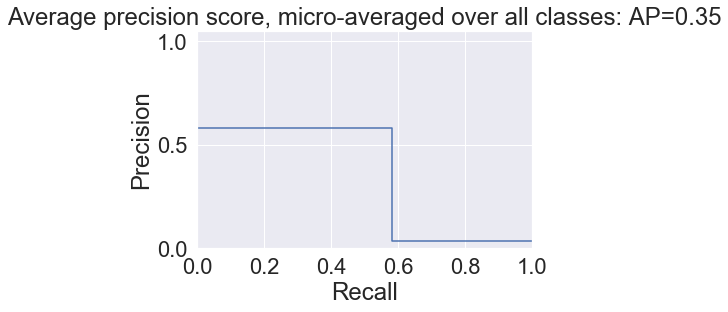

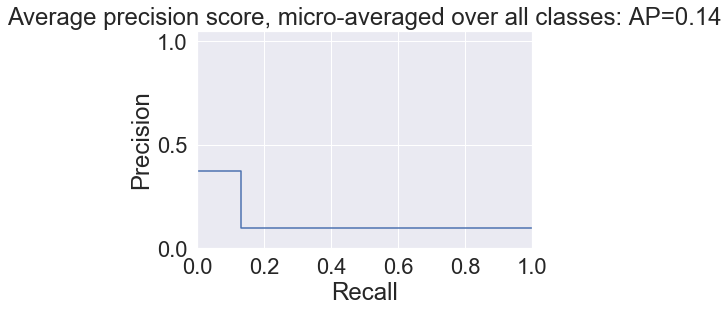

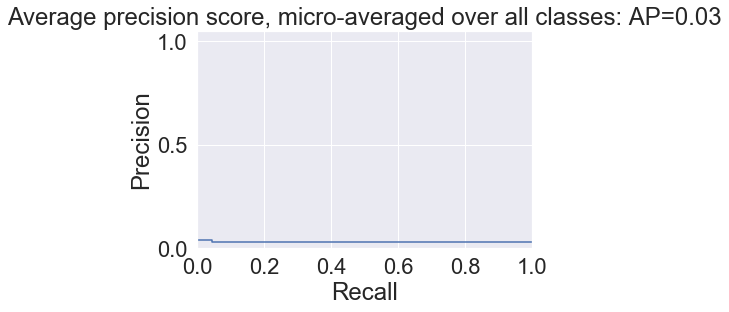

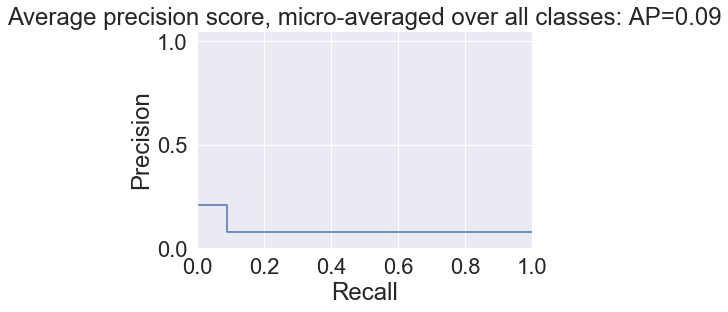

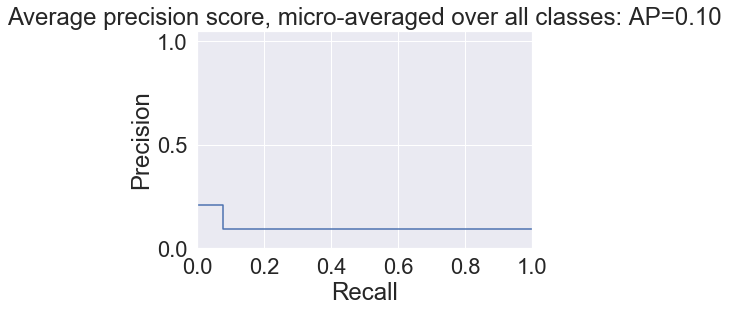

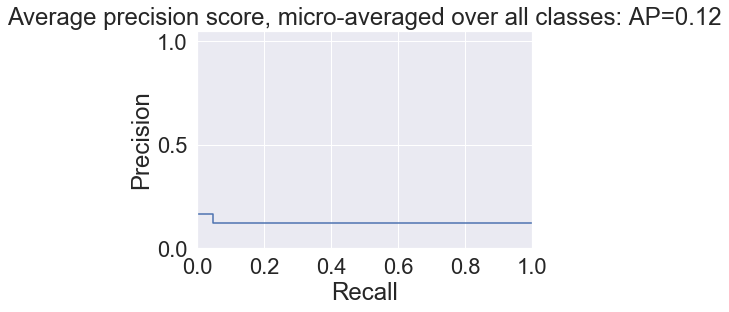

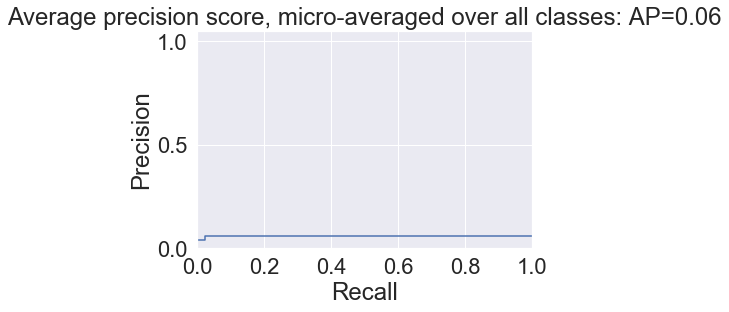

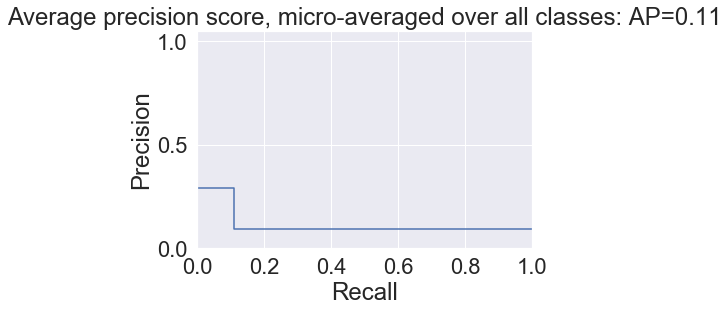

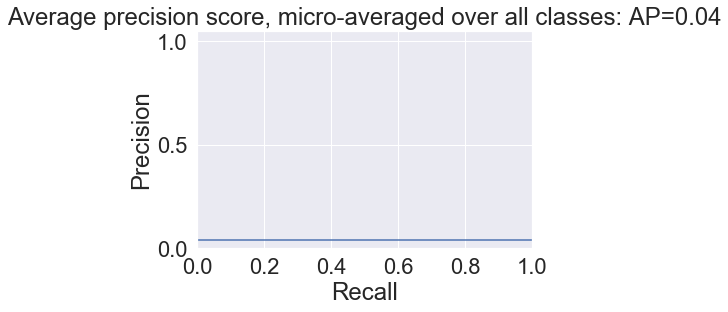

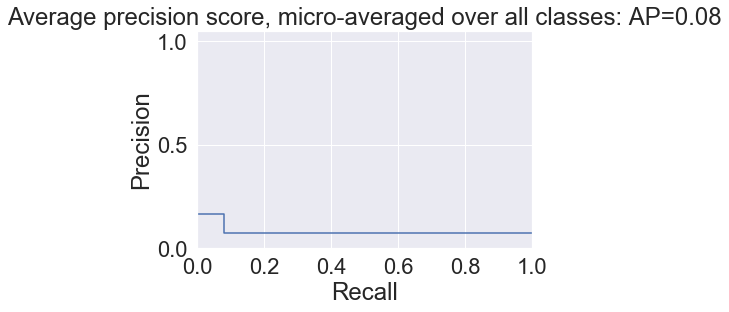

In [135]:
run_split(data_classifier2, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test)


In [ ]:

y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)

plot_classes(probability, y_true, y_test)

confusion_matrix(y_true, y_pred, confusionMatrix, i)

prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)

persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
   acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
   jaccard_macro , prec , rec, fscore, i)


In [95]:
probabilities = predictions
y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)



Accuracy Score
0.08333333333333333
---------

Accuracy Score not normalized
1
---------

zero_one_loss
0.9166666666666666
---------

Fmeasure Score
0.5833333333333334
---------

AUC-PR
0.3546455938697319
---------

hamming loss average
0.028735632183908046
---------

Jaccard samples
0.2833333333333333
---------

Jaccard macro
0.4117647058823529
---------



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.35


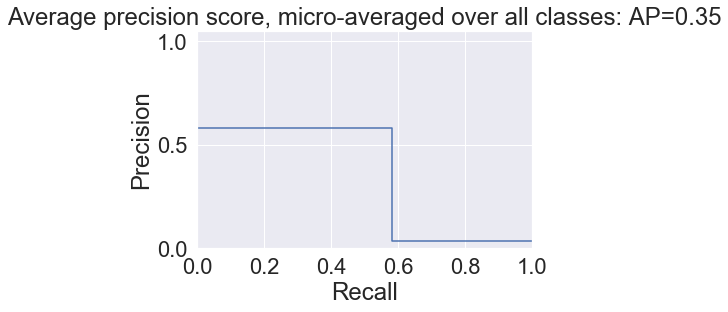

In [97]:
probability = predict
plot_classes(probability, y_true, y_test)


In [119]:
confusion_matrix(y_true, y_pred, confusionMatrix, i)


0
Rejected_contribution
Rejected_contribution,12
Rejected_contribution,12,0
Rejected_contribution,12,0,0
Rejected_contribution,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0']
1
Regular_contribution
Regular_contribution,10
Regular_contribution,10,1
Regular_contribution,10,1,0
Regular_contribution,10,1,0,1
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,10,1,0,1']
2
Organizing_committee
Organizing_committee,12
Organizing_committee,12,0
Organizing_committee,12,0,0
Organizing_committee,12,0,0,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,10,1,0,1', 'Organizing_committee,12,0,0,0']
3
Conference
Conference,9
Conference,9,2
Conference,9,2,1
Conference,9,2,1,0
['Label, TN, FP, FN, TP', 'Rejected_contribution,12,0,0,0', 'Regular_contribution,10,1,0,1', 'Organizing_committee,12,0,0,0', 'Conference,9,2,1,0']
4
Review_expertise
Review_expertise,11
Review_expertise,11,0
Review_expertise,11,0,1
Review_expert

In [126]:
prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)


   Accuracy  Acc-Score  zero_one_loss    AUC-PR  hamming loss average  \
0  0.083333          1       0.916667  0.354646              0.028736   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0         0.283333       0.411765   0.583333  0.583333  0.583333  
---------



                Rejected_contribution  Regular_contribution  \
precision                         0.0              0.500000   
recall                            0.0              1.000000   
f-measure                         0.0              0.666667   
samples_tested                    0.0              1.000000   

                Organizing_committee  Conference  Review_expertise  \
precision                        0.0         0.0               0.0   
recall                           0.0         0.0               0.0   
f-measure                        0.0         0.0               0.0   
samples_tested                   0.0         1.0               1.0   

                Track-workshop_chair  A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
   acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
   jaccard_macro , prec , rec, fscore, i)


Current date and time : 
2020-06-06 11:07:07
tupla: (datetime.datetime(2020, 6, 6, 11, 7, 7, 475324), '(1,1)', '25', 'Yes', '0.2', 'DecisionTree', '0.08333333333333333', '1', '0.9166666666666666', '0.3546455938697319', '0.028735632183908046', '0.2833333333333333', '0.4117647058823529', '0.5833333333333334', '0.5833333333333334', '0.5833333333333334', '0')
17
Pandas(Index=0, date_time=nan, _2=nan, _3=nan, Stop_Word=nan, _5=nan, Algorithm=nan, Accuracy_Score=nan, Accuracy_Score_not_normalized=nan, zero_one_loss=nan, _10=nan, hamming_loss_avg=nan, Jaccard_samples=nan, Jaccard_macro=nan, Precision=nan, Recall=nan, Fmeasure_Score=nan)
Pandas(Index=1, date_time=nan, _2=nan, _3=nan, Stop_Word=nan, _5=nan, Algorithm=nan, Accuracy_Score=nan, Accuracy_Score_not_normalized=nan, zero_one_loss=nan, _10=nan, hamming_loss_avg=nan, Jaccard_samples=nan, Jaccard_macro=nan, Precision=nan, Recall=nan, Fmeasure_Score=nan)
Pandas(Index=2, date_time=nan, _2=nan, _3=nan, Stop_Word=nan, _5=nan, Algorithm=nan, 